In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np

In [2]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

170500096/170498071 [==============================] - 87s 1us/step
50000 train samples
10000 test samples
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [0]:
# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  return model
# lr_decay = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001 + 0.02 * math.pow(0.5, 1+epoch), verbose=True)

In [4]:
import os

resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

W0620 01:45:28.183866 139735530567552 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
with strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='categorical_crossentropy',
      metrics=['accuracy'])

In [10]:
model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    batch_size=128,
    epochs=25,
    steps_per_epoch=390,
    validation_data=(x_test[::2].astype(np.float32), y_test[::2].astype(np.float32)),
#     validation_freq=17
)

Epoch 1/25
390/390 [==============================] - 21s 53ms/step - loss: 1.7918 - acc: 0.3219 - val_loss: 1.3669 - val_acc: 0.4912
Epoch 2/25
390/390 [==============================] - 19s 50ms/step - loss: 1.3450 - acc: 0.5111 - val_loss: 1.2076 - val_acc: 0.5480
Epoch 3/25
390/390 [==============================] - 21s 53ms/step - loss: 1.1644 - acc: 0.5848 - val_loss: 1.0157 - val_acc: 0.6340
Epoch 4/25
390/390 [==============================] - 21s 54ms/step - loss: 1.0427 - acc: 0.6297 - val_loss: 0.9120 - val_acc: 0.6750
Epoch 5/25
390/390 [==============================] - 21s 55ms/step - loss: 0.9479 - acc: 0.6646 - val_loss: 0.8811 - val_acc: 0.6850
Epoch 6/25
390/390 [==============================] - 22s 57ms/step - loss: 0.8808 - acc: 0.6904 - val_loss: 0.7416 - val_acc: 0.7312
Epoch 7/25
390/390 [==============================] - 24s 61ms/step - loss: 0.8307 - acc: 0.7086 - val_loss: 0.7001 - val_acc: 0.7516
Epoch 8/25
390/390 [==============================] - 26s 66ms

In [11]:
score = model.evaluate(x_test.astype(np.float32), y_test.astype(np.float32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 29s 93ms/step
Test loss: 0.5517639297361191
Test accuracy: 0.8135


In [0]:
import matplotlib.pyplot as plt

In [0]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(toimage(X[k]),interpolation='bicubic')
            k = k+1
    # show the plot
    plt.show()

Prediction:  bird 
Correct answer:  bird


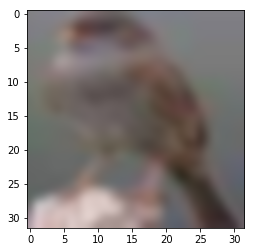

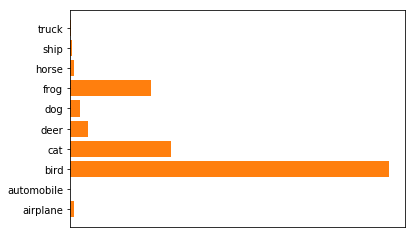

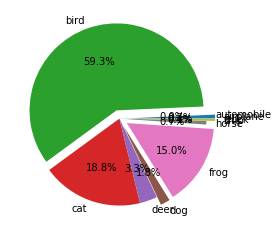

In [15]:
names =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
ck=np.random.randint(0,10000//8)
inp,y_inp=x_test.astype(np.float32)[ck*8:(ck+1)*8], y_test.astype(np.float32)[ck*8:(ck+1)*8]
logits=model.predict(inp)
ans=logits.argmax(axis=1)
cor=y_inp.argmax(axis=1)
logits=logits[0]
print("Prediction: ",names[int(ans[0])],"\nCorrect answer: ",names[int(cor[0])])
plt.imshow(inp[0],interpolation='bicubic')
plt.show()
plt.barh(range(len(logits)),logits,color='#ff7f0e')
plt.yticks(range(len(logits)),names)
plt.xticks([])
plt.show()
explode=np.zeros(10)
explode[ans]=0.1
plt.pie(logits,labels=names,autopct='%1.1f%%',explode=explode)
plt.show()

In [0]:
model.save_weights("model.h5")